In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Read The Data

In [5]:
df = pd.read_csv('covid_19_india.csv')

In [8]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])
value_to_delete = '-'
df = df[df['ConfirmedIndianNational'] != value_to_delete]
df['ConfirmedIndianNational'] = df['ConfirmedIndianNational'].astype(int)
df['ConfirmedForeignNational'] = df['ConfirmedForeignNational'].astype(int)

C:\Users\Dinesh Gadwal\AppData\Local\Temp\ipykernel_30320\1595080509.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
C:\Users\Dinesh Gadwal\AppData\Local\Temp\ipykernel_30320\1595080509.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ConfirmedIndianNational'] = df['ConfirmedIndianNational'].astype(int)
C:\Users\Dinesh Gadwal\AppData\Local\Temp\ipykernel_30320\1595080509.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [11]:
df.describe()

,Sno,Date,Time,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
count,446.000000,446,446,446.000000,446.000000,446.000000,446.000000,446.000000
mean,223.500000,2020-03-16 08:10:45.739910400,2024-03-17 17:30:56.502242048,12.188341,1.495516,1.089686,0.244395,13.683857
min,1.000000,2020-01-30 00:00:00,2024-03-17 10:00:00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,112.250000,2020-03-12 00:00:00,2024-03-17 18:00:00,1.000000,0.000000,0.000000,0.000000,2.000000
50%,223.500000,2020-03-19 00:00:00,2024-03-17 18:00:00,3.000000,0.000000,0.000000,0.000000,4.000000
75%,334.750000,2020-03-24 00:00:00,2024-03-17 18:00:00,13.000000,1.000000,1.000000,0.000000,15.000000
max,446.000000,2020-03-28 00:00:00,2024-03-17 18:00:00,177.000000,14.000000,25.000000,5.000000,180.000000
std,128.893367,NaN,NaN,21.582253,3.576292,2.642952,0.596546,22.550937


In [12]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [15]:
df.shape

(446, 9)

In [16]:
df.drop('Sno',axis=1,inplace=True)

C:\Users\Dinesh Gadwal\AppData\Local\Temp\ipykernel_30320\1919576323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Sno',axis=1,inplace=True)


In [17]:
df.corr(method = 'pearson', numeric_only=True)

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
ConfirmedIndianNational,1.000000,0.194089,0.588755,0.588811,0.987825
ConfirmedForeignNational,0.194089,1.000000,0.226141,-0.047411,0.344339
Cured,0.588755,0.226141,1.000000,0.244046,0.599328
Deaths,0.588811,-0.047411,0.244046,1.000000,0.556000
Confirmed,0.987825,0.344339,0.599328,0.556000,1.000000


Text(0.5, 1.0, 'Correlation of numerical attributes with Deaths')

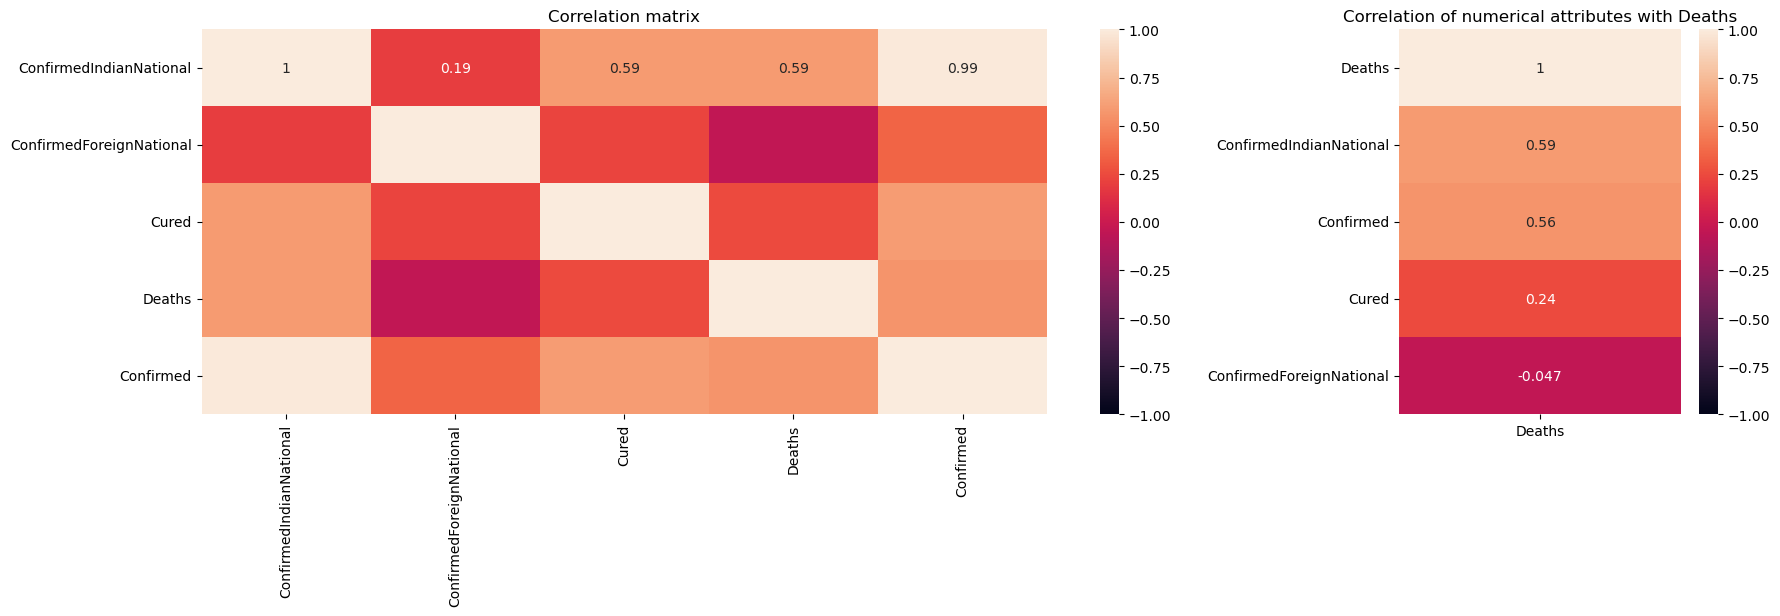

In [18]:
f, axs = plt.subplots(1, 2, figsize=(20, 5), width_ratios=[3, 1])

sns.heatmap(data=df.corr(method="pearson", numeric_only=True), vmin=-1, vmax=1, annot=True, ax=axs[0])
axs[0].set_title("Correlation matrix")

sns.heatmap(data=df.corr(method="pearson", numeric_only=True)[["Deaths"]].sort_values('Deaths', ascending=False), vmin=-1, vmax=1, annot=True, ax=axs[1])
axs[1].set_title("Correlation of numerical attributes with Deaths")

Text(0.5, 1.0, 'chart of Deaths')

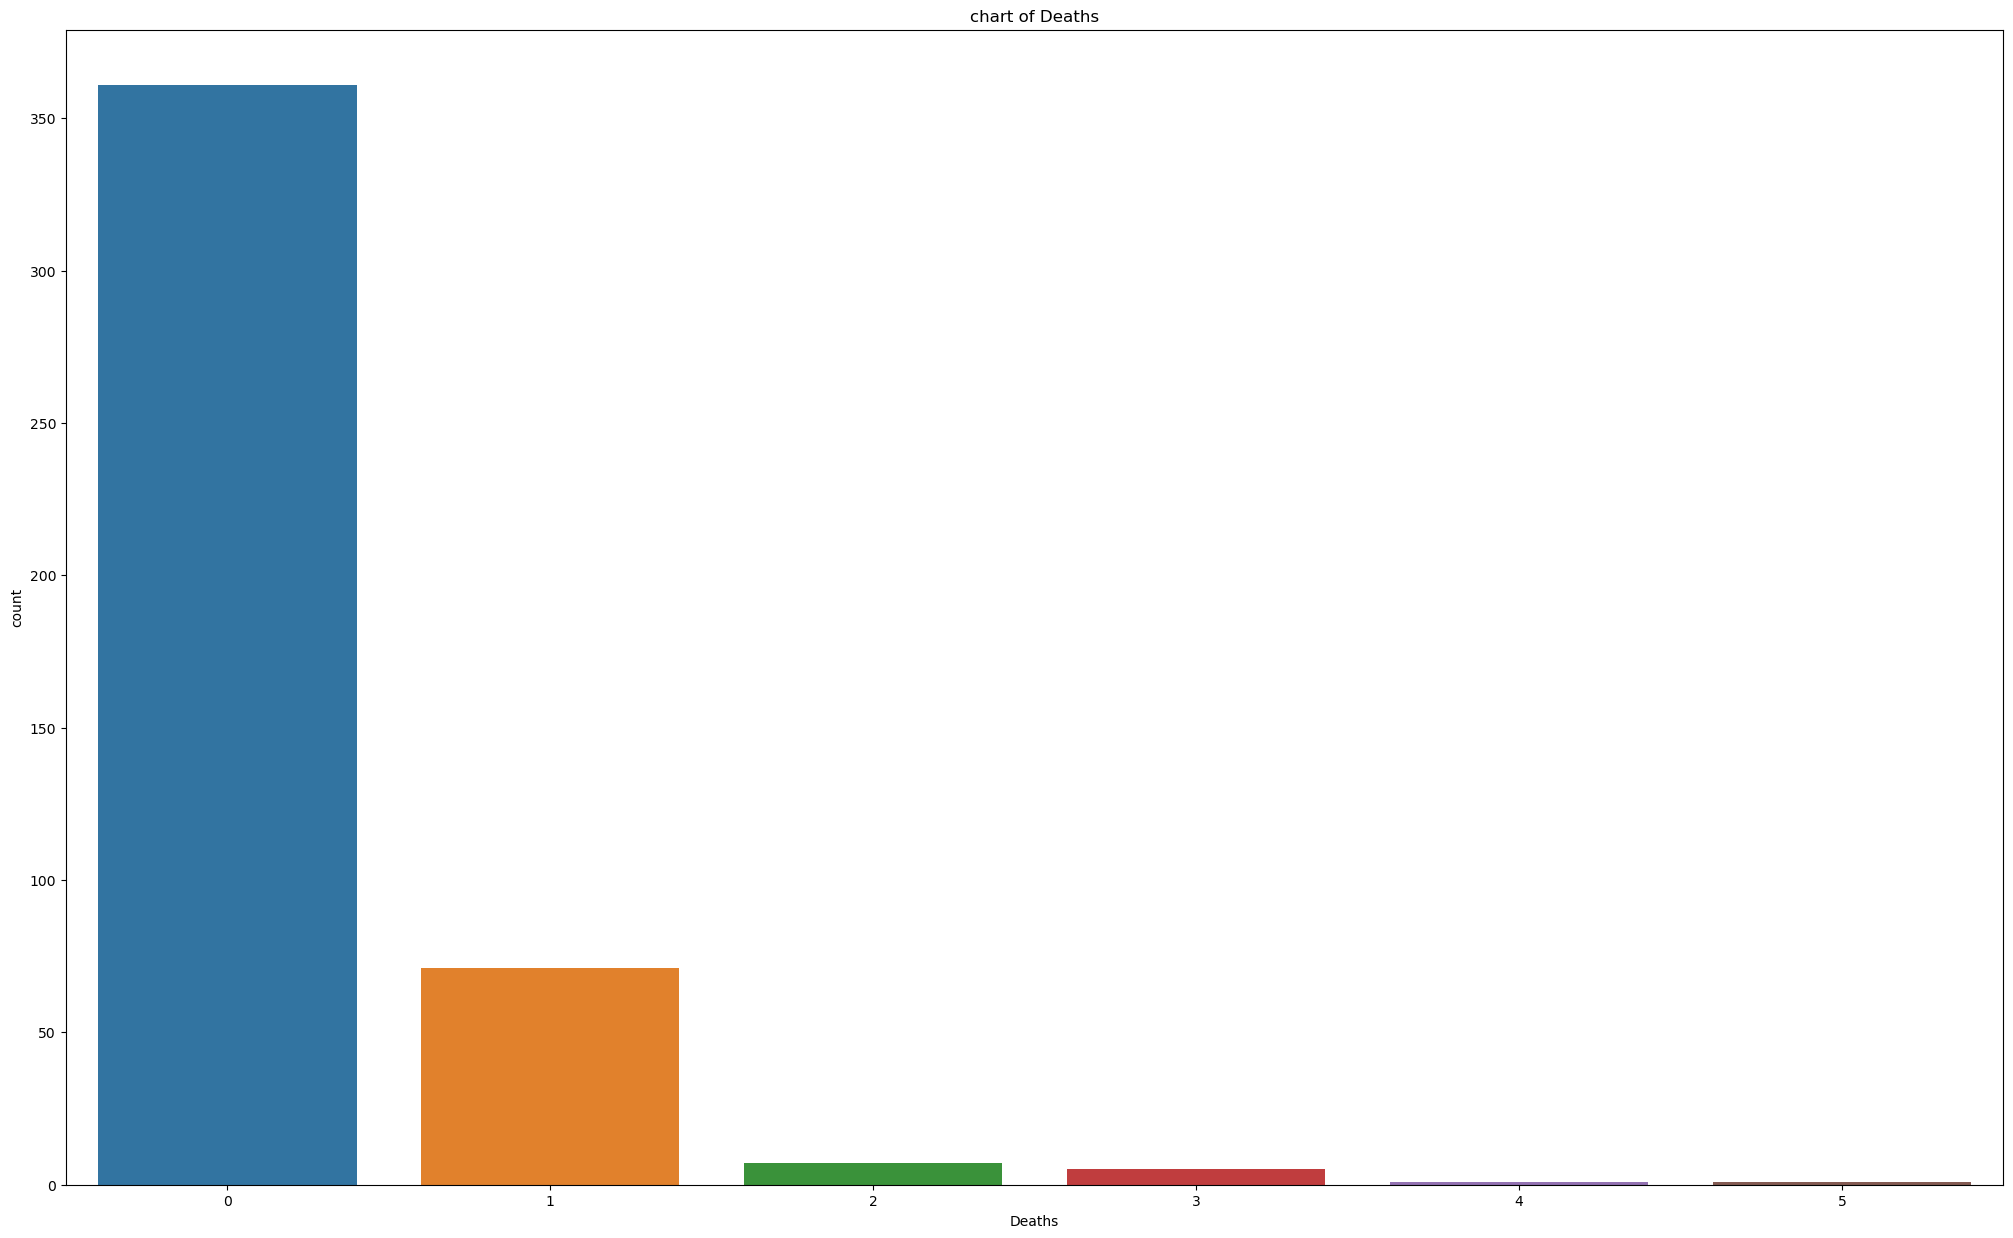

In [28]:
plt.figure(figsize=(25, 15))
sns.countplot(x='Deaths', data=df)
plt.title("chart of Deaths")

Text(0.5, 1.0, 'chart of State/UnionTerritory')

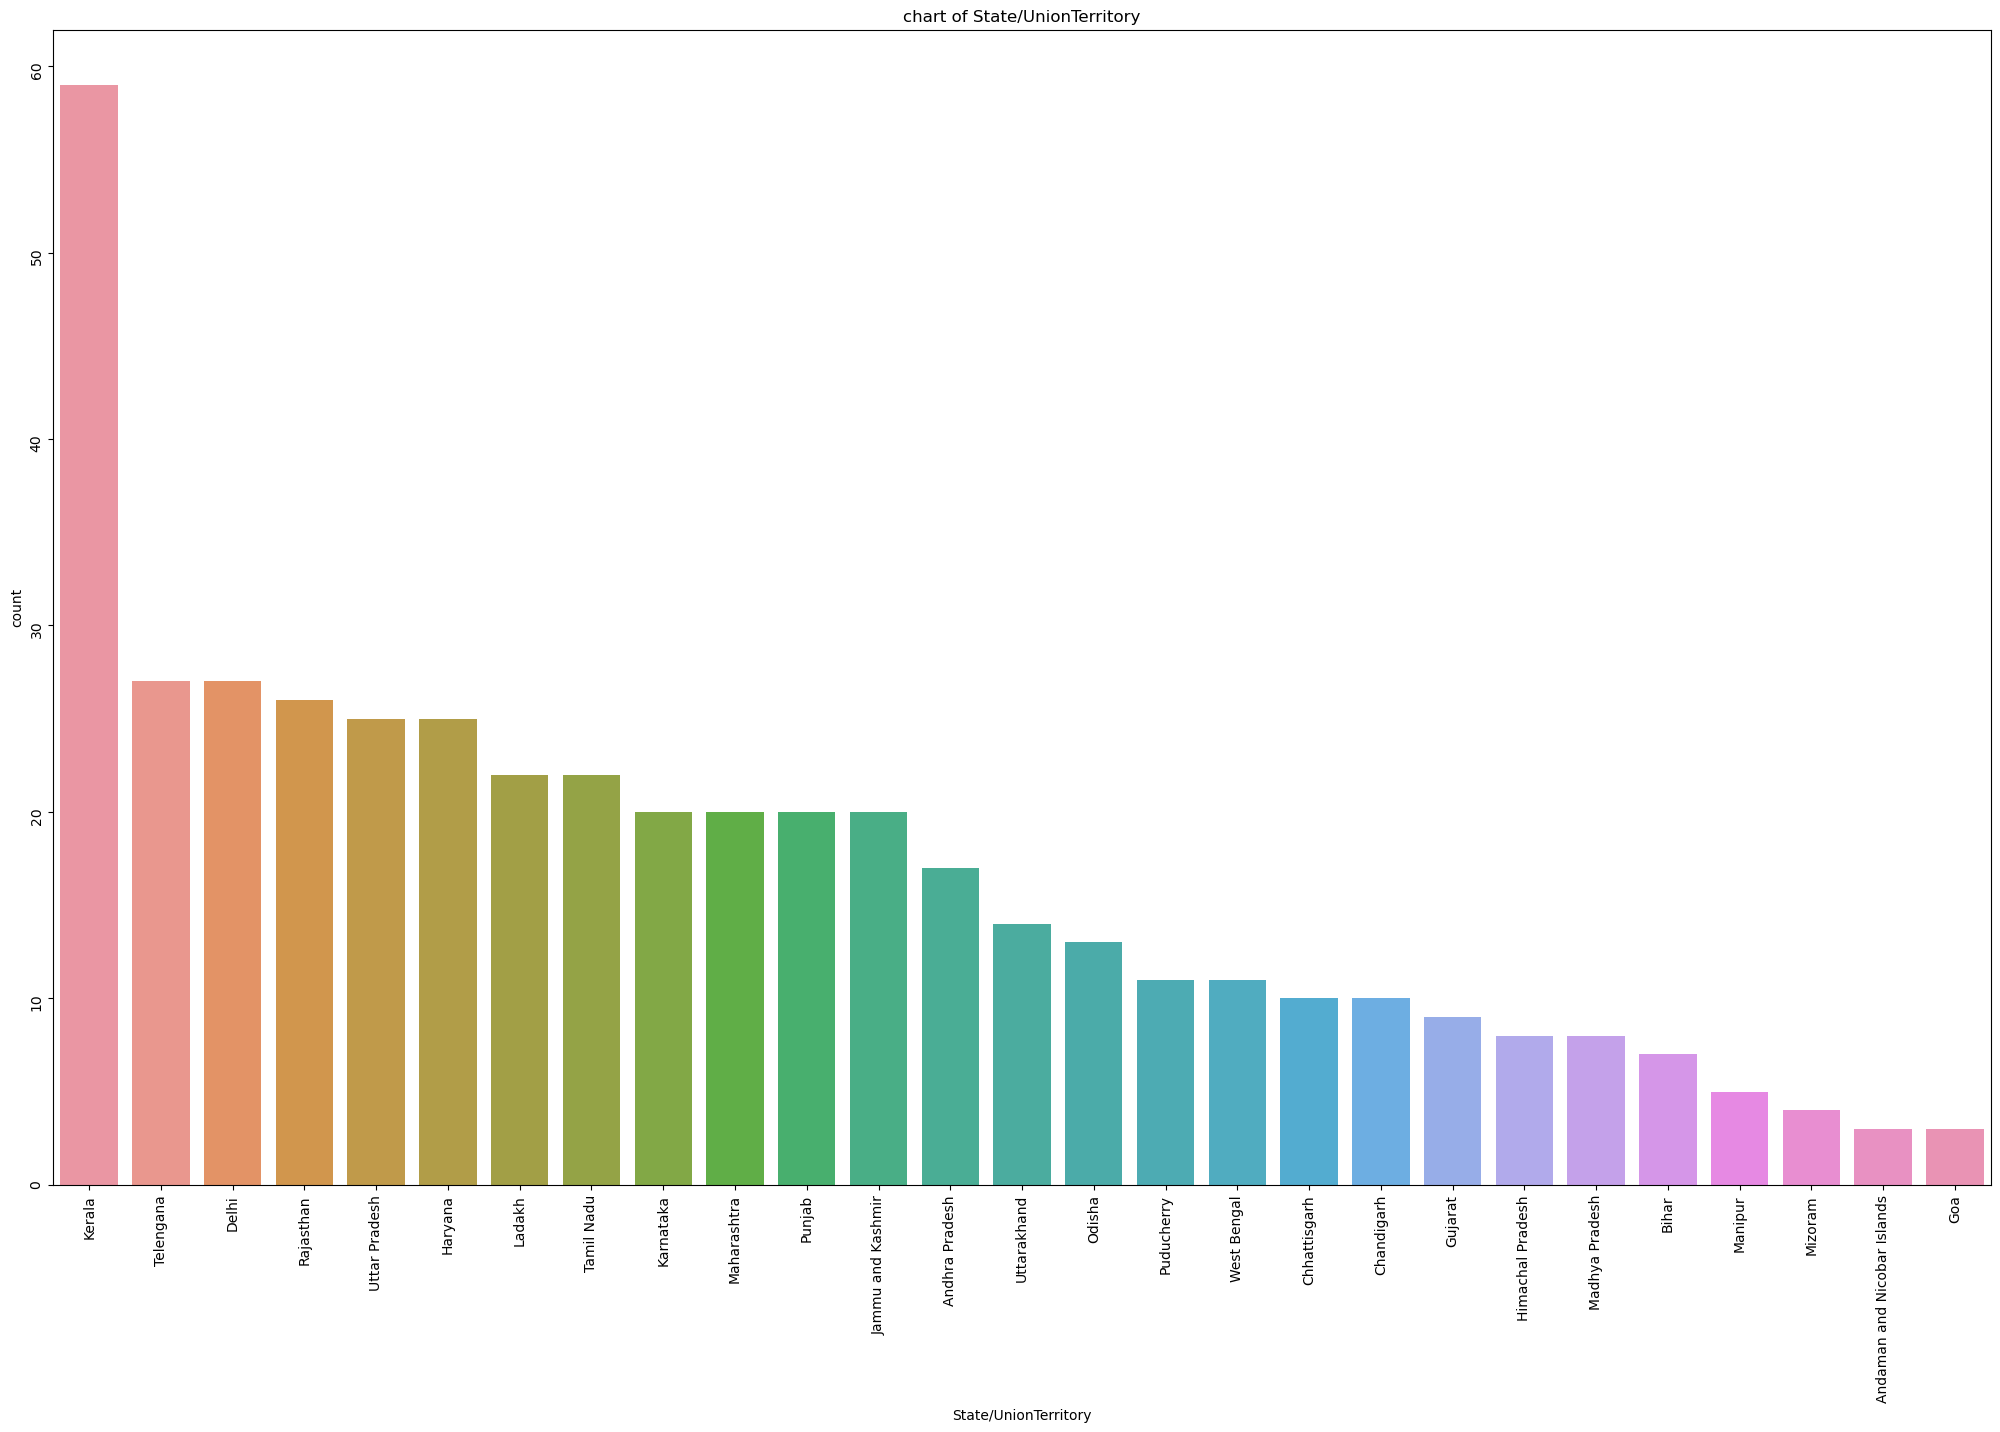

In [29]:
plt.figure(figsize=(25, 15))
plt.tick_params(rotation=90)
sns.countplot(x='State/UnionTerritory', data=df)
plt.title("chart of State/UnionTerritory")

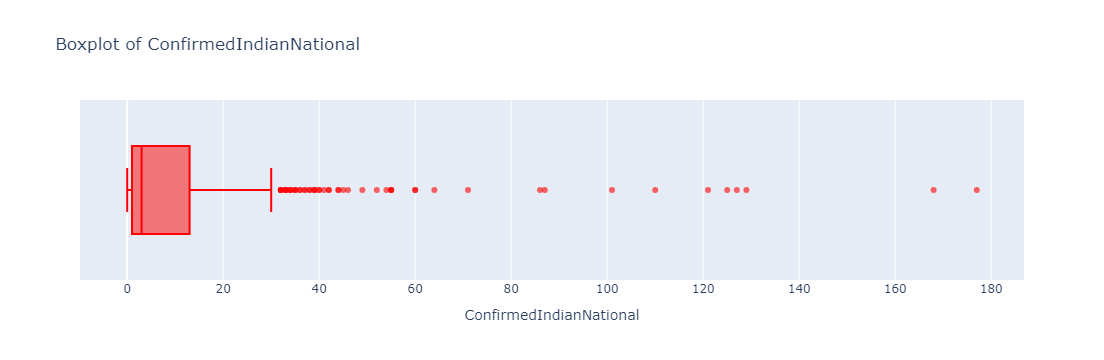

<Figure size 2500x1500 with 0 Axes>

In [30]:
plt.figure(figsize=(25, 15))
fig = px.box(data_frame=df, x="ConfirmedIndianNational", title="Boxplot of ConfirmedIndianNational")
fig.update_traces(marker={"color": "red", "opacity": 0.6})
fig.show()

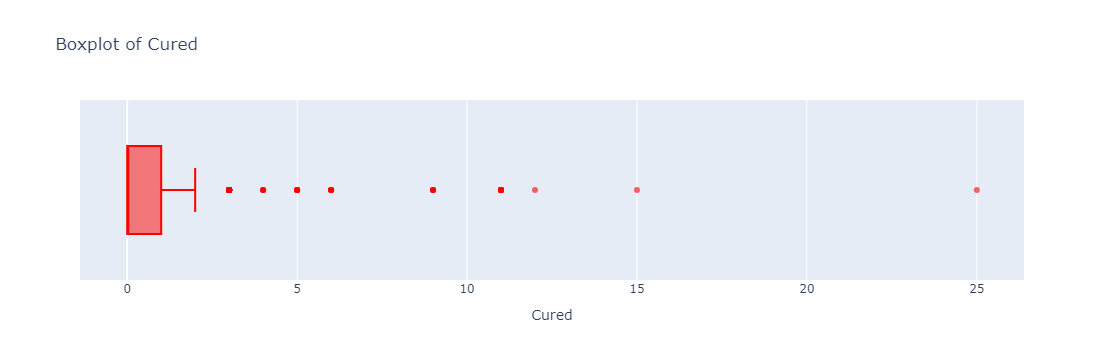

<Figure size 2500x1500 with 0 Axes>

In [31]:
plt.figure(figsize=(25, 15))
fig = px.box(data_frame=df, x="Cured", title="Boxplot of Cured")
fig.update_traces(marker={"color": "red", "opacity": 0.6})
fig.show()


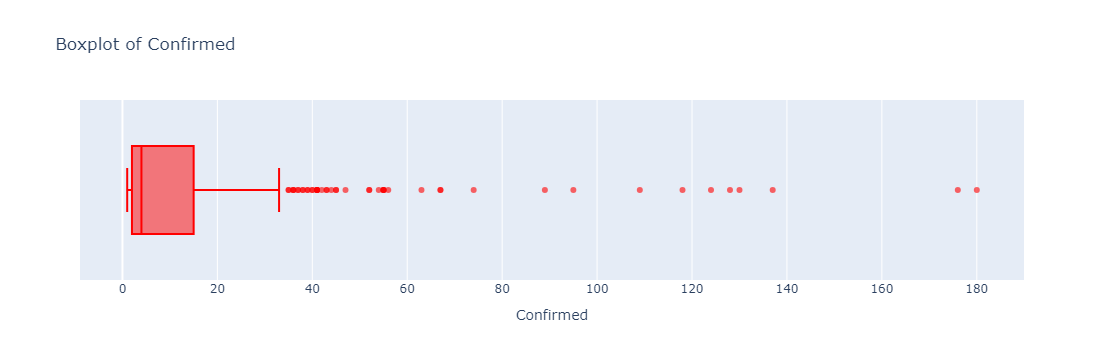

<Figure size 2500x1500 with 0 Axes>

In [32]:
plt.figure(figsize=(25, 15))
fig = px.box(data_frame=df, x="Confirmed", title="Boxplot of Confirmed")
fig.update_traces(marker={"color": "red", "opacity": 0.6})
fig.show()